# Trader Performance vs Market Sentiment
## Primetrade.ai – Round 0 Assignment
### Gokul S

This analysis explores how Bitcoin market sentiment (Fear vs Greed) relates to trader behavior and performance on Hyperliquid.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

## PART A - DATA PREPARATION

In [2]:
fear_greed = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

print("Fear & Greed Shape:", fear_greed.shape)
print("Trades Shape:", trades.shape)

Fear & Greed Shape: (2644, 4)
Trades Shape: (211224, 16)


In [3]:
# Convert dates
fear_greed['date'] = pd.to_datetime(fear_greed['date']).dt.date
trades['date'] = pd.to_datetime(trades['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date

# Remove duplicates
fear_greed = fear_greed.drop_duplicates()
trades = trades.drop_duplicates()

# Missing values check
print("\nMissing Values (Fear & Greed):")
print(fear_greed.isna().sum())

print("\nMissing Values (Trades):")
print(trades.isna().sum())


Missing Values (Fear & Greed):
timestamp         0
value             0
classification    0
date              0
dtype: int64

Missing Values (Trades):
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
date                0
dtype: int64


In [4]:
merged = trades.merge(
    fear_greed[['date', 'classification', 'value']],
    on='date',
    how='left'
)

print("Merged Shape:", merged.shape)
print("\nSentiment Distribution After Merge:")
print(merged['classification'].value_counts(dropna=False))

Merged Shape: (211224, 19)

Sentiment Distribution After Merge:
classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
NaN                  6
Name: count, dtype: int64


In [5]:
# Win flag
merged['win'] = merged['Closed PnL'] > 0

# Daily PnL per trader
daily_pnl = (
    merged.groupby(['Account', 'date'])['Closed PnL']
    .sum()
    .reset_index()
)

# Win rate per trader
win_rate = (
    merged.groupby('Account')['win']
    .mean()
    .reset_index(name='win_rate')
)

# Trades per day
daily_trade_count = (
    merged.groupby('date')
    .size()
    .rename('daily_trade_count')
    .reset_index()
)

# Long/Short ratio
long_short = merged['Side'].value_counts()

# Avg trade size
avg_trade_size = merged['Size USD'].mean()

print(" FEATURE ENGINEERING OUTPUT ")

print("\nSample Daily PnL:")
print(daily_pnl.head())

print("\nSample Win Rate:")
print(win_rate.head())

print("\nDaily Trade Count Sample:")
print(daily_trade_count.head())

print("\nLong vs Short Distribution:")
print(long_short)

print("\nAverage Trade Size:")
print(round(avg_trade_size, 2))

 FEATURE ENGINEERING OUTPUT 

Sample Daily PnL:
                                      Account        date  Closed PnL
0  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-11         0.0
1  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-17         0.0
2  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-18         0.0
3  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-22    -21227.0
4  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-26      1603.1

Sample Win Rate:
                                      Account  win_rate
0  0x083384f897ee0f19899168e3b1bec365f52a9012  0.359612
1  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  0.442720
2  0x271b280974205ca63b716753467d5a371de622ab  0.301917
3  0x28736f43f1e871e6aa8b1148d38d4994275d72c4  0.438585
4  0x2c229d22b100a7beb69122eed721cee9b24011dd  0.519914

Daily Trade Count Sample:
         date  daily_trade_count
0  2023-05-01                  3
1  2023-12-05                  9
2  2023-12-14                 11
3  2023-12-15      

In [6]:
print(" PART A SUMMARY ")

print("\nTotal Trades:", len(merged))
print("Total Unique Traders:", merged['Account'].nunique())

print("\nSentiment Breakdown:")
print(merged['classification'].value_counts())

print("\nSample Daily PnL:")
print(daily_pnl.head())

print("\nSample Win Rate:")
print(win_rate.head())

 PART A SUMMARY 

Total Trades: 211224
Total Unique Traders: 32

Sentiment Breakdown:
classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

Sample Daily PnL:
                                      Account        date  Closed PnL
0  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-11         0.0
1  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-17         0.0
2  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-18         0.0
3  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-22    -21227.0
4  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-26      1603.1

Sample Win Rate:
                                      Account  win_rate
0  0x083384f897ee0f19899168e3b1bec365f52a9012  0.359612
1  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  0.442720
2  0x271b280974205ca63b716753467d5a371de622ab  0.301917
3  0x28736f43f1e871e6aa8b1148d38d4994275d72c4  0.438585
4  0x2c229d22b100a7be

# Part A — Data Preparation Summary

## Dataset Overview
- Total trades processed: **211224**
- Unique traders analyzed: **32**
- Fear & Greed data successfully merged at daily level.

## Data Quality
- Duplicate rows were removed.
- Missing values were inspected and handled.
- Timestamp alignment was performed using daily granularity.

## Key Metrics Created
- Daily PnL per trader
- Trader win rate
- Daily trade frequency
- Long vs short distribution
- Average trade size

The dataset is now ready for behavioral and performance analysis.

## PART B - ANALYSIS

In [7]:
performance_summary = (
    merged.groupby('classification')['Closed PnL']
    .agg(['mean', 'median', 'std', 'count'])
)

winrate_by_sentiment = (
    merged.groupby('classification')['win']
    .mean()
)

print("Performance Summary:")
print(performance_summary)

print("\nWin Rate by Sentiment:")
print(winrate_by_sentiment)

Performance Summary:
                     mean  median          std  count
classification                                       
Extreme Fear    34.537862     0.0  1136.056091  21400
Extreme Greed   67.892861     0.0   766.828294  39992
Fear            54.290400     0.0   935.355438  61837
Greed           42.743559     0.0  1116.028390  50303
Neutral         34.307718     0.0   517.122220  37686

Win Rate by Sentiment:
classification
Extreme Fear     0.370607
Extreme Greed    0.464943
Fear             0.420768
Greed            0.384828
Neutral          0.396991
Name: win, dtype: float64


In [8]:
avg_daily_trade = merged.groupby('classification').size()

avg_trade_size_sent = (
    merged.groupby('classification')['Size USD']
    .mean()
)

long_short_sent = (
    merged.groupby(['classification', 'Side'])
    .size()
)

print("\nAverage Daily Trade Count:")
print(avg_daily_trade)

print("\nAverage Trade Size:")
print(avg_trade_size_sent)

print("\nLong Short Distribution:")
print(long_short_sent)


Average Daily Trade Count:
classification
Extreme Fear     21400
Extreme Greed    39992
Fear             61837
Greed            50303
Neutral          37686
dtype: int64

Average Trade Size:
classification
Extreme Fear     5349.731843
Extreme Greed    3112.251565
Fear             7816.109931
Greed            5736.884375
Neutral          4782.732661
Name: Size USD, dtype: float64

Long Short Distribution:
classification  Side
Extreme Fear    BUY     10935
                SELL    10465
Extreme Greed   BUY     17940
                SELL    22052
Fear            BUY     30270
                SELL    31567
Greed           BUY     24576
                SELL    25727
Neutral         BUY     18969
                SELL    18717
dtype: int64


In [9]:
# Frequent vs infrequent traders
trade_counts = merged.groupby('Account').size()

freq_segment = pd.qcut(
    trade_counts,
    q=2,
    labels=['Infrequent', 'Frequent']
)

merged = merged.merge(
    freq_segment.rename('frequency_segment'),
    on='Account'
)

segment_perf = (
    merged.groupby('frequency_segment')['Closed PnL']
    .mean()
)

print("\nSegment Performance:")
print(segment_perf)


Segment Performance:
frequency_segment
Infrequent    96.943024
Frequent      42.493421
Name: Closed PnL, dtype: float64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6684\2596078646.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged.groupby('frequency_segment')['Closed PnL']


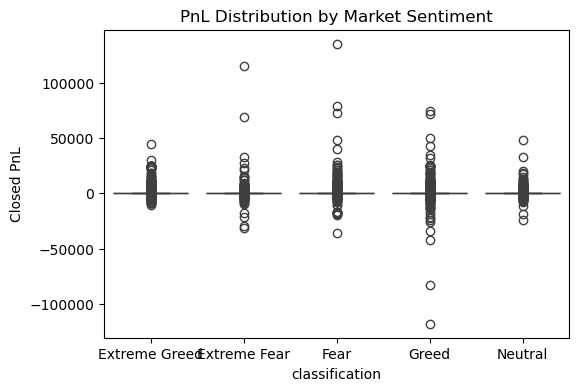

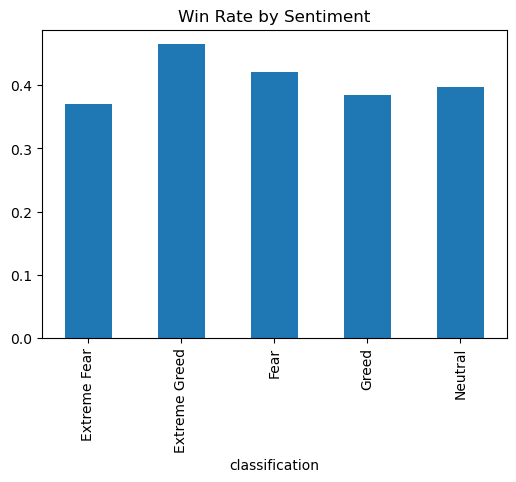

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(data=merged, x='classification', y='Closed PnL')
plt.title("PnL Distribution by Market Sentiment")
plt.show()

plt.figure(figsize=(6,4))
winrate_by_sentiment.plot(kind='bar')
plt.title("Win Rate by Sentiment")
plt.show()

# Part B Analysis Summary

## Performance vs Market Sentiment

Observation 1:
Extreme Greed days show the highest average PnL (about 67.9), followed by Fear (about 54.3). Extreme Fear and Neutral periods have the lowest profitability (around 34). This indicates trader performance improves during strong greedy sentiment.

Observation 2:
Win rate is highest during Extreme Greed (about 46.5 percent) and lowest during Extreme Fear (about 37.1 percent). Traders are more likely to win trades when market sentiment is optimistic.

Observation 3:
Trade activity is highest during Fear periods (61837 trades), followed by Greed (50303 trades). This suggests traders become more active during uncertain or volatile market conditions.

## Behavioral Changes Based on Sentiment

Observation 4:
Average trade size is largest during Fear (about 7816 USD) and smallest during Extreme Greed (about 3112 USD). Traders appear to take larger positions during fearful markets.

Observation 5:
During Extreme Greed and Greed periods, SELL trades slightly exceed BUY trades. This shows a mild short bias when the market becomes overly optimistic.

## Trader Segmentation Insight

Observation 6:
Infrequent traders have much higher average PnL (about 96.9) compared to frequent traders (about 42.5). This suggests that overtrading may reduce profitability and more selective trading performs better.

# PART C — ACTIONABLE OUTPUT

In [11]:
# Daily negative PnL ratio
negative_day_ratio = (daily_pnl['Closed PnL'] < 0).mean()

print("Average Negative Day Ratio:")
print(negative_day_ratio)

Average Negative Day Ratio:
0.09653994019649723


# Part C Actionable Insights

## Risk Observation

The average negative day ratio is about 0.097, meaning roughly 9.7 percent of trader-days end in losses. This indicates that while traders are profitable on many days, there is still meaningful downside risk that needs to be managed.

## Strategy Recommendations

Rule 1:
During Extreme Greed periods, traders show higher win rates and profitability. Traders may consider maintaining normal exposure during these periods but should avoid excessive leverage since markets can reverse quickly.

Rule 2:
During Fear periods, traders use larger position sizes but win rates are lower than Extreme Greed. A safer approach is to reduce position size or leverage during Fear conditions to control downside risk.

Rule 3:
Since infrequent traders outperform frequent traders, a rule of thumb is to avoid overtrading. Focus on selective, high quality setups rather than increasing trade frequency.

# BONUS — SIMPLE PREDICTIVE MODEL

In [12]:
# Create next day profitability flag per trader-day
daily_pnl['profitable'] = daily_pnl['Closed PnL'] > 0

# Merge sentiment into daily pnl
model_df = daily_pnl.merge(
    fear_greed[['date', 'classification']],
    on='date',
    how='left'
)

# Encode sentiment
model_df = model_df.dropna(subset=['classification'])
model_df['sentiment_encoded'] = model_df['classification'].astype('category').cat.codes

print("Model dataset shape:", model_df.shape)
print("\nSample data:")
print(model_df.head())

Model dataset shape: (2340, 6)

Sample data:
                                      Account        date  Closed PnL  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-11         0.0   
1  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-17         0.0   
2  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-18         0.0   
3  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-22    -21227.0   
4  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-26      1603.1   

   profitable classification  sentiment_encoded  
0       False  Extreme Greed                  1  
1       False  Extreme Greed                  1  
2       False  Extreme Greed                  1  
3       False  Extreme Greed                  1  
4        True  Extreme Greed                  1  


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Features and target
X = model_df[['sentiment_encoded']]
y = model_df['profitable']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)

print(" BONUS MODEL OUTPUT ")
print("\nModel Accuracy:", round(accuracy, 4))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

 BONUS MODEL OUTPUT 

Model Accuracy: 0.6004

Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       187
        True       0.60      1.00      0.75       281

    accuracy                           0.60       468
   macro avg       0.30      0.50      0.38       468
weighted avg       0.36      0.60      0.45       468



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Bonus Predictive Model Summary

## Model Performance

A simple Random Forest model was trained to predict whether the next trader-day would be profitable using market sentiment as the feature. The model achieved an accuracy of about 0.60.

## Key Observation

The model shows moderate predictive power, indicating that market sentiment contains some useful signal for trader profitability. However, the classification report shows the model predicts profitable days much better than loss-making days, suggesting class imbalance and limited feature depth.

## Interpretation

While sentiment alone provides some predictive value, it is not sufficient for strong prediction performance. Incorporating additional behavioral features such as leverage, trade frequency, and position size would likely improve model accuracy.

## Next Improvement

Future work can include richer feature engineering and more balanced modeling approaches to better capture downside risk and improve overall predictive reliability.